In [18]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf =SVC()

In [4]:
X,y = make_moons(n_samples=100,noise=0.15)
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)


In [25]:
type(X)

numpy.ndarray

In [32]:
#Make it a dataframe
import pandas as pd
df = pd.DataFrame(X)
df[2]=y
df.columns = ['Zero','One','Target']
df.head()

,Zero,One,Target
0,1.081856,-0.612025,1
1,0.043129,0.345730,1
2,0.289168,-0.439946,1
3,-0.621929,1.004285,0
4,0.998172,0.571894,0


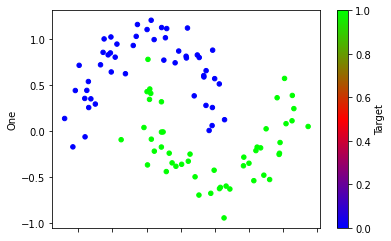

In [37]:
df.plot.scatter(x='Zero',y='One',c = 'Target',colormap='brg')

In [15]:
#Estimator ensemble creates a list of ensmeble elements
#Classifier have not been trained
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)], voting = 'hard')


In [20]:

from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.92
RandomForestClassifier 1.0
SVC 0.96
VotingClassifier 0.96


In [23]:
#Evaluation in the easy way
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
   
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,clf.score(X_test,y_test))

LogisticRegression 0.92
RandomForestClassifier 1.0
SVC 0.96
VotingClassifier 0.96
